In [92]:
import pathlib

import tensorflow as tf
import numpy as np

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

import cv2 as cv

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.models import Model

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19

from tensorflow.keras.applications import ResNet50
from keras.applications import InceptionV3
from tensorflow.keras.applications import Xception

from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.layers import Input, Dense

import tensorflow_datasets as tfds

#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from keras.applications import VGG16
from keras import backend as K

from sklearn.model_selection import train_test_split

print(tf.test.gpu_device_name())
print(tf.__version__)

/device:GPU:0
2.1.0


## Lendo dados a partir de arquivos diretamente
* ImageDataGenerator (Keras)

In [42]:
!ls /home/silvio/git/datasets/dogsCatsDB/smallDS/trainSmall

cat.10447.jpg  cat.10809.jpg  cat.1116.jpg   dog.1107.jpg   dog.1143.jpg
cat.10448.jpg  cat.1080.jpg   cat.11170.jpg  dog.11080.jpg  dog.11440.jpg
cat.10449.jpg  cat.10810.jpg  cat.11171.jpg  dog.11081.jpg  dog.11441.jpg
cat.10450.jpg  cat.10811.jpg  cat.11172.jpg  dog.11082.jpg  dog.11442.jpg
cat.10451.jpg  cat.10812.jpg  cat.11173.jpg  dog.11083.jpg  dog.11443.jpg
cat.10452.jpg  cat.10813.jpg  cat.11174.jpg  dog.11084.jpg  dog.11444.jpg
cat.10453.jpg  cat.10814.jpg  cat.11175.jpg  dog.11085.jpg  dog.11445.jpg
cat.10454.jpg  cat.10815.jpg  cat.11176.jpg  dog.11086.jpg  dog.11446.jpg
cat.10455.jpg  cat.10816.jpg  cat.11177.jpg  dog.11087.jpg  dog.11447.jpg
cat.10456.jpg  cat.10817.jpg  cat.11178.jpg  dog.11088.jpg  dog.11448.jpg
cat.10457.jpg  cat.10818.jpg  cat.11179.jpg  dog.11089.jpg  dog.11449.jpg
cat.10458.jpg  cat.10819.jpg  cat.1117.jpg   dog.1108.jpg   dog.1144.jpg
cat.10459.jpg  cat.1081.jpg   cat.11180.jpg  dog.11090.jpg  dog.11450.jpg
cat.1045.jpg   cat.10820.jpg  cat.11181.

## Rotina para percorrer arquivos de um diretório
    * para cada arquivo de imagem registrar como um registro no dataset

In [43]:
X = []
y = []
convert = lambda category : int(category == 'dog')

# Percorre os arquivos no diretório de imagens para treinamento

def create_test_data(path):
    for p in os.listdir(path):

        # categoria da imagem é definida pelo nome do arquivo
        category = p.split(".")[0]

        # define categoria como 0 ou 1
        category = convert(category)
        
        # Abre a imagem usando opencv em escala de cinza
        #img_array = cv.imread(os.path.join(path,p),cv.IMREAD_GRAYSCALE)
        img_array = cv.imread(os.path.join(path,p),cv.IMREAD_COLOR)
        
        #img_array = cv.imread(os.path.join(path,p))

        # Redimensionamento para 80 x 80 pixels
        new_img_array = cv.resize(img_array, dsize=(80, 80))
        
        X.append(new_img_array)
        y.append(category)


path="/home/silvio/git/datasets/dogsCatsDB/smallDS/trainSmall"
create_test_data(path)

x_trainA = X.copy()
y_trainA = y.copy()

x_train = np.array(x_trainA).reshape(-1, 80,80,3)
y_train = np.array(y_trainA)

X = []
y = []

path="/home/silvio/git/datasets/dogsCatsDB/smallDS/testSmall"
create_test_data(path)

x_testA = X.copy()
y_testA = y.copy()

x_test = np.array(x_testA).reshape(-1, 80,80,3)
y_test = np.array(y_testA)

X = []
y = []

path="/home/silvio/git/datasets/dogsCatsDB/smallDS/validSmall"
create_test_data(path)

x_evalA = X.copy()
y_evalA = y.copy()

x_eval = np.array(x_evalA).reshape(-1, 80,80,3)
y_eval = np.array(y_evalA)

#print(X.shape)
#print(y.shape)

#x_train_all, x_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
#x_train, x_eval, y_train, y_eval = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state = 42)


## Rede Neural para classificar como Gato ou Cachorro

In [52]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(80, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

## Os dados para rodar a rede neural serão passados usando o método flow_from_directory
* Não é necessário conversões prévias dos dados

In [51]:
!ls /home/silvio/git/datasets/dogsCatsDB/

bkp   dogs     sampleSubmission.csv  test1	testGEN  trainGEN   validGEN
cats  preview  smallDS		     test1.zip	train	 train.zip


In [61]:
datagen = ImageDataGenerator()
# load and iterate training dataset
train_it = datagen.flow_from_directory('/home/silvio/git/datasets/dogsCatsDB/trainGEN', 
                                       target_size=(80, 80),class_mode='binary', batch_size=10)
# load and iterate validation dataset
val_it = datagen.flow_from_directory('/home/silvio/git/datasets/dogsCatsDB/validGEN', 
                                     target_size=(80, 80),class_mode='binary', batch_size=16)
# load and iterate test dataset
test_it = datagen.flow_from_directory('/home/silvio/git/datasets/dogsCatsDB/testGEN', 
                                      target_size=(80, 80),class_mode='binary', batch_size=16)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Confirmando que iterador funciona

In [57]:
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
print('batchy shape=%s, min=%.3f, max=%.3f' % (batchy.shape, batchy.min(), batchy.max()))

Batch shape=(10, 80, 80, 3), min=0.000, max=255.000
batchy shape=(10,), min=0.000, max=1.000


## Comparando duas formas de model fit
* Lendo de objetos numpy da memória
* Lendo de arquivos diretamente

In [63]:
history = model.fit(train_it, steps_per_epoch=100, validation_data=val_it, validation_steps=8, epochs=5)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 8 steps
Epoch 1/5
100/100 [==============================] - 7s 74ms/step - loss: 0.6343 - accuracy: 0.6690 - val_loss: 0.6923 - val_accuracy: 0.6094
Epoch 2/5
100/100 [==============================] - 8s 77ms/step - loss: 0.5723 - accuracy: 0.7120 - val_loss: 0.7816 - val_accuracy: 0.5859
Epoch 3/5
100/100 [==============================] - 8s 78ms/step - loss: 0.5229 - accuracy: 0.7380 - val_loss: 0.6978 - val_accuracy: 0.6406
Epoch 4/5
100/100 [==============================] - 8s 78ms/step - loss: 0.5169 - accuracy: 0.7210 - val_loss: 0.7077 - val_accuracy: 0.6406
Epoch 5/5
100/100 [==============================] - 8s 78ms/step - loss: 0.5009 - accuracy: 0.7520 - val_loss: 0.9174 - val_accuracy: 0.6172


In [64]:
history_mem = model.fit(x_train,
                    y_train,
                    epochs=10,
                    validation_data=(x_eval, y_eval), batch_size=32)

Train on 2000 samples, validate on 1000 samples
Epoch 1/10
2000/2000 [==============================] - 1s 623us/sample - loss: 0.5167 - accuracy: 0.7515 - val_loss: 0.8039 - val_accuracy: 0.6170
Epoch 2/10
2000/2000 [==============================] - 1s 346us/sample - loss: 0.4050 - accuracy: 0.8075 - val_loss: 0.9316 - val_accuracy: 0.6150
Epoch 3/10
2000/2000 [==============================] - 1s 344us/sample - loss: 0.3422 - accuracy: 0.8400 - val_loss: 0.6935 - val_accuracy: 0.6920
Epoch 4/10
2000/2000 [==============================] - 1s 347us/sample - loss: 0.2763 - accuracy: 0.8760 - val_loss: 0.8972 - val_accuracy: 0.6490
Epoch 5/10
2000/2000 [==============================] - 1s 365us/sample - loss: 0.2205 - accuracy: 0.9105 - val_loss: 0.7603 - val_accuracy: 0.6850
Epoch 6/10
2000/2000 [==============================] - 1s 348us/sample - loss: 0.1748 - accuracy: 0.9355 - val_loss: 0.8121 - val_accuracy: 0.6880
Epoch 7/10
2000/2000 [==============================] - 1s 364us

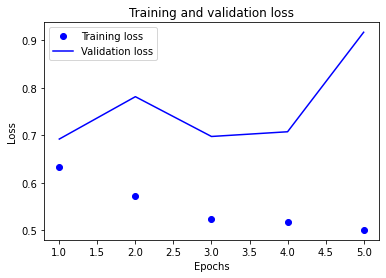

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

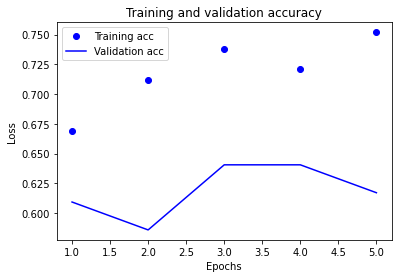

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

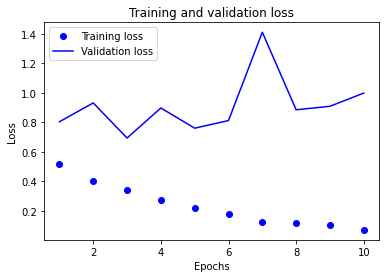

In [67]:
loss = history_mem.history['loss']
val_loss = history_mem.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

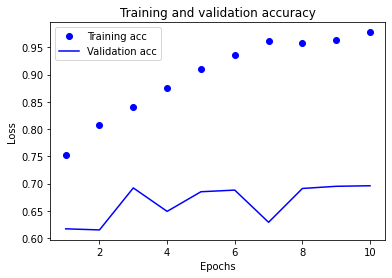

In [68]:
acc = history_mem.history['accuracy']
val_acc = history_mem.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
model.evaluate(test_it)

  ...
    to  
  ['...']
63/63 [==============================] - 3s 48ms/step - loss: 1.1089 - accuracy: 0.6740


[1.1088713847455525, 0.674]

In [71]:
model.evaluate(x_test)

  32/1000 [..............................] - ETA: 1s

IndexError: list index out of range

In [216]:
!ls /home/silvio/git/datasets/dogsCatsDB/preview

cat_0_1019.jpeg  cat_0_4338.jpeg  cat_0_6486.jpeg  cat_0_9055.jpeg
cat_0_1706.jpeg  cat_0_4670.jpeg  cat_0_6523.jpeg  cat_0_9404.jpeg
cat_0_2756.jpeg  cat_0_4814.jpeg  cat_0_7597.jpeg  cat_0_9943.jpeg
cat_0_3525.jpeg  cat_0_4981.jpeg  cat_0_7833.jpeg
cat_0_384.jpeg	 cat_0_579.jpeg   cat_0_868.jpeg
cat_0_4183.jpeg  cat_0_6364.jpeg  cat_0_8985.jpeg


## Data Augmentation
* Recurso para aumentar quantidade de amostras

In [74]:
!rm -rf ../datasets/dogsCatsDB/preview/*

# Gerando novas imagens a partir do objeto data_generator do keras

In [77]:
datagen = ImageDataGenerator(
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/home/silvio/git/datasets/dogsCatsDB/cats/train/cat.1062.jpg') 
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/home/silvio/git/datasets/dogsCatsDB/preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 5:
        break  # Recurso de parada do gerador

In [78]:
!ls ../datasets/dogsCatsDB/preview/


cat_0_3897.jpeg  cat_0_4502.jpeg  cat_0_8801.jpeg
cat_0_4023.jpeg  cat_0_7667.jpeg  cat_0_9288.jpeg


## Imagem Original
![image](../datasets/dogsCatsDB/cats/train/cat.1062.jpg)
## Novas imagens geradas
![image](../datasets/dogsCatsDB/preview/cat_0_3897.jpeg)
![image](../datasets/dogsCatsDB/preview/cat_0_4023.jpeg)
![image](../datasets/dogsCatsDB/preview/cat_0_4502.jpeg)
![image](../datasets/dogsCatsDB/preview/cat_0_7667.jpeg)
![image](../datasets/dogsCatsDB/preview/cat_0_8801.jpeg)
![image](../datasets/dogsCatsDB/preview/cat_0_9288.jpeg)

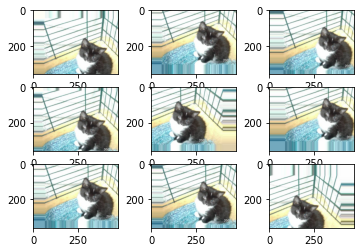

In [80]:
from numpy import expand_dims
img = load_img('/home/silvio/git/datasets/dogsCatsDB/cats/train/cat.1062.jpg')

data = img_to_array(img)
samples = expand_dims(data, 0)
#datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
it = datagen.flow(samples, batch_size=1)

for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [38]:
datagen = ImageDataGenerator()
val_it = datagen.flow_from_directory('/home/silvio/git/datasets/dogsCatsDB/validGEN', target_size=(80, 80),class_mode='binary', batch_size=8)
test_it = datagen.flow_from_directory('/home/silvio/git/datasets/dogsCatsDB/testGEN', target_size=(80, 80),class_mode='binary', batch_size=8)

train_it_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_it = train_it_datagen.flow_from_directory(
    directory="/home/silvio/git/datasets/dogsCatsDB/trainGEN",
    target_size=(80, 80),
    color_mode="rgb",
    batch_size=100,
    class_mode="binary",
    shuffle=True,
    seed=42
)



Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [39]:
#history = model.fit(train_it, steps_per_epoch=16, validation_data=val_it, validation_steps=8, epochs=100)
history = model.fit(train_it, steps_per_epoch=25, validation_data=val_it, validation_steps=8, epochs=10)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 25 steps, validate for 8 steps
Epoch 1/10
20/25 [=======================>......] - ETA: 5s - loss: 0.8471 - accuracy: 0.6720WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 250 batches). You may need to use the repeat() function when building your dataset.


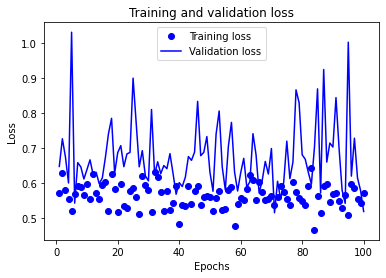

In [266]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

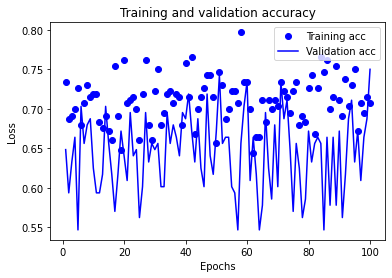

In [267]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Reutilizando um modelo treinado para treinar apenas última camada
* Removendo a última camada e subsituindo por outra

In [82]:
vgg162 = VGG16(weights='imagenet', include_top=True)
vgg162.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [84]:
# Generate a model with all layers (with top)
vgg16 = VGG16(weights='imagenet', include_top=True)

for layer in vgg16.layers:
    layer.trainable = False

#Add a layer where input is the output of the  second last layer 
x = Dense(1, activation='softmax', name='predictionsDG')(vgg16.layers[-2].output)

#Then create the corresponding model 
my_model = Model(input=vgg16.input, output=x)
my_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  # This is added back by InteractiveShellApp.init_path()


In [85]:
my_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [88]:
baseModel = InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
#headModel = Dense(len(config.CLASSES), activation="softmax")(headModel)
headModel = Dense(1, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [89]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [11]:
!ls /home/silvio/git/datasets/dogsCatsDB/smallDS/trainSmall

testSmall  trainSmall  validSmall


## Pré-processamento tem que ser refeito para considerar entrada da rede VGG 224 x 224 

In [86]:
main_dir="/home/silvio/git/datasets/dogsCatsDB/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

X = []
y = []
convert = lambda category : int(category == 'dog')

# Percorre os arquivos no diretório de imagens para treinamento

def create_test_data(path):
    for p in os.listdir(path):

        # categoria da imagem é definida pelo nome do arquivo
        category = p.split(".")[0]

        # define categoria como 0 ou 1
        category = convert(category)
        
        # Abre a imagem usando opencv em escala de cinza
        #img_array = cv.imread(os.path.join(path,p),cv.IMREAD_GRAYSCALE)
        img_array = cv.imread(os.path.join(path,p))

        # Redimensionamento para 80 x 80 pixels
        new_img_array = cv.resize(img_array, dsize=(224, 224))
        
        X.append(new_img_array)
        y.append(category)

#path="/home/silvio/git/datasets/dogsCatsDB/train"
path="/home/silvio/git/datasets/dogsCatsDB/smallDS/trainSmall"
create_test_data(path)

print(np.array(X).shape)
print(np.array(y).shape)
X = np.array(X).reshape(-1, 224,224,3)
y = np.array(y)

print(type(X))
print(type(y))

x_train_all, x_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
x_train, x_eval, y_train, y_eval = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state = 42)

print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

print(x_test.shape)
print(y_test.shape)

(2000, 224, 224, 3)
(2000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1280, 224, 224, 3)
(1280,)
(320, 224, 224, 3)
(320,)
(400, 224, 224, 3)
(400,)


In [87]:
history = my_model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_eval, y_eval))


Train on 1280 samples, validate on 320 samples
Epoch 1/30
1280/1280 [==============================] - 4s 3ms/step - loss: 7.5348 - accuracy: 0.5086 - val_loss: 7.2434 - val_accuracy: 0.5250
Epoch 2/30
1280/1280 [==============================] - 3s 3ms/step - loss: 7.5348 - accuracy: 0.5086 - val_loss: 7.2434 - val_accuracy: 0.5250
Epoch 3/30
1280/1280 [==============================] - 3s 3ms/step - loss: 7.5348 - accuracy: 0.5086 - val_loss: 7.2434 - val_accuracy: 0.5250
Epoch 4/30
1280/1280 [==============================] - 3s 3ms/step - loss: 7.5348 - accuracy: 0.5086 - val_loss: 7.2434 - val_accuracy: 0.5250
Epoch 5/30
1280/1280 [==============================] - 3s 3ms/step - loss: 7.5348 - accuracy: 0.5086 - val_loss: 7.2434 - val_accuracy: 0.5250
Epoch 6/30
1280/1280 [==============================] - 3s 3ms/step - loss: 7.5348 - accuracy: 0.5086 - val_loss: 7.2434 - val_accuracy: 0.5250
Epoch 7/30
1280/1280 [==============================] - 3s 3ms/step - loss: 7.5348 - accu

In [90]:
history_2 = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_eval, y_eval))

Train on 1280 samples, validate on 320 samples
Epoch 1/30
1280/1280 [==============================] - 27s 21ms/step - loss: 7.5348 - accuracy: 0.5086 - val_loss: 7.2434 - val_accuracy: 0.5250
Epoch 2/30
1280/1280 [==============================] - 9s 7ms/step - loss: 7.5348 - accuracy: 0.5086 - val_loss: 7.2434 - val_accuracy: 0.5250
Epoch 3/30
1280/1280 [==============================] - 9s 7ms/step - loss: 7.5348 - accuracy: 0.5086 - val_loss: 7.2434 - val_accuracy: 0.5250
Epoch 4/30
1280/1280 [==============================] - 9s 7ms/step - loss: 7.5348 - accuracy: 0.5086 - val_loss: 7.2434 - val_accuracy: 0.5250
Epoch 5/30
1280/1280 [==============================] - 9s 7ms/step - loss: 7.5348 - accuracy: 0.5086 - val_loss: 7.2434 - val_accuracy: 0.5250
Epoch 6/30
1280/1280 [==============================] - 9s 7ms/step - loss: 7.5348 - accuracy: 0.5086 - val_loss: 7.2434 - val_accuracy: 0.5250
Epoch 7/30
1280/1280 [==============================] - 9s 7ms/step - loss: 7.5348 - ac

KeyboardInterrupt: 

In [ ]:
## Rede Neural sem reutilizar VGG

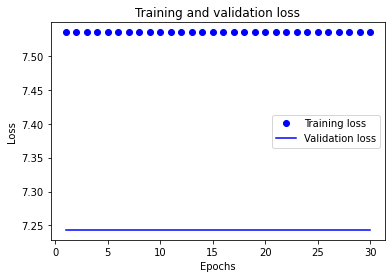

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

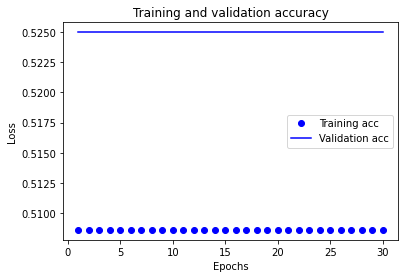

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Inspecionando convnets


(1, 224, 224, 3)


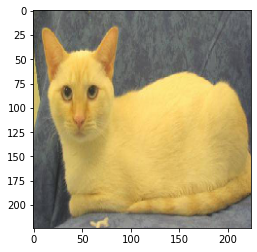

In [94]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import tensorflow.keras.preprocessing.image as image
img_path = '/home/silvio/git/datasets/dogsCatsDB/cats/train/cat.1108.jpg'

img = image.load_img(img_path, target_size=(224, 224)) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

## Inspecionando saída da camada 8

* Escolhendo apenas camada 8

In [97]:
layer_outputs = [layer.output for layer in model.layers[:8]] 

activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]

print(first_layer_activation.shape)

AttributeError: 'tuple' object has no attribute 'layer'

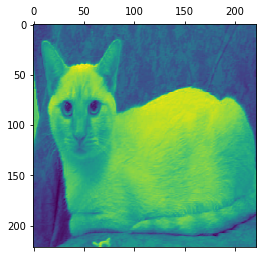

In [86]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

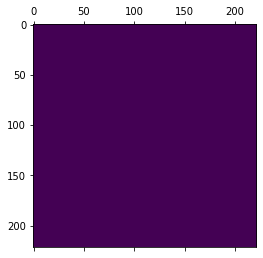

In [87]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

## Código que mostra todas as transformações de filtros presentes nas 8 primeiras camadas

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


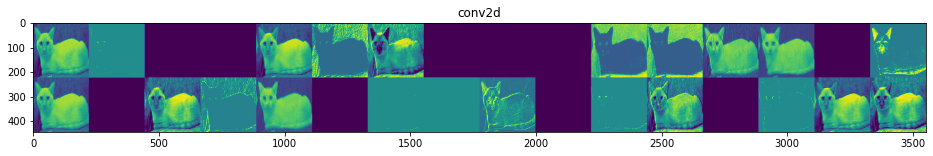

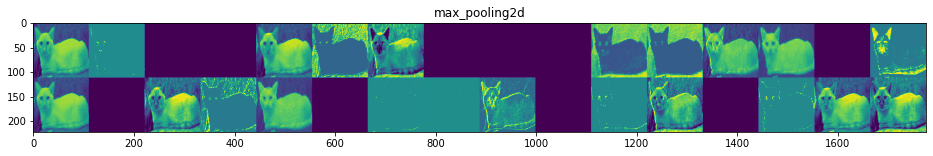

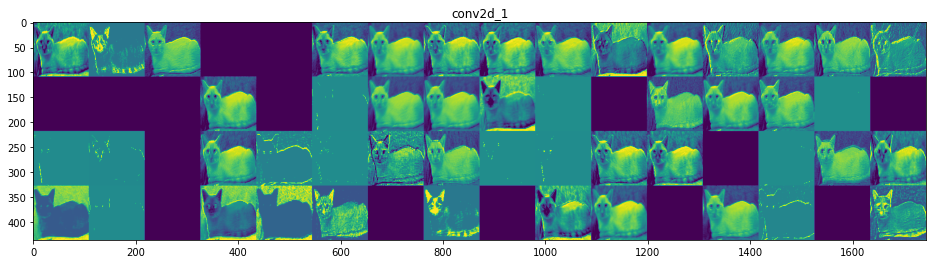

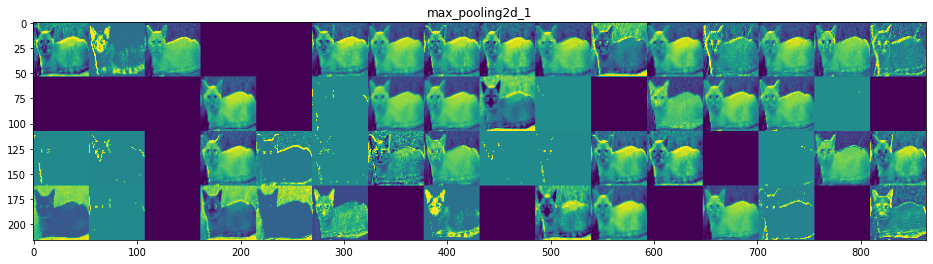

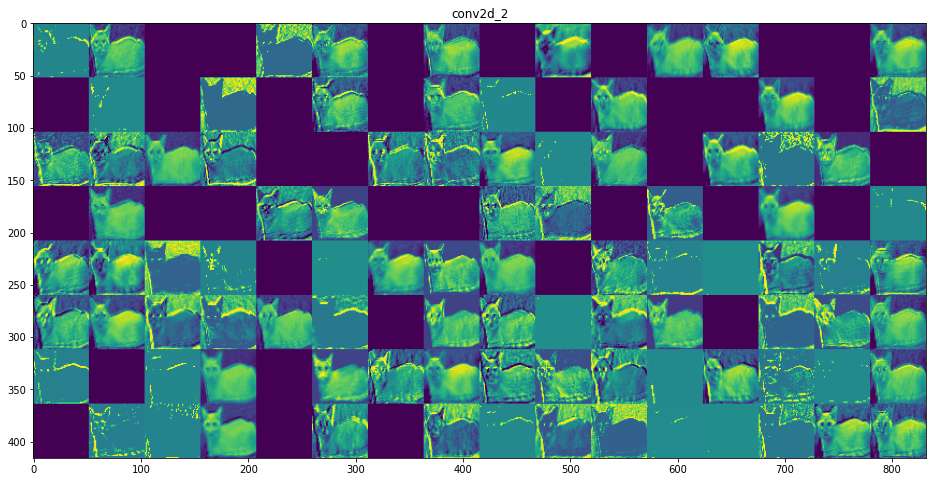

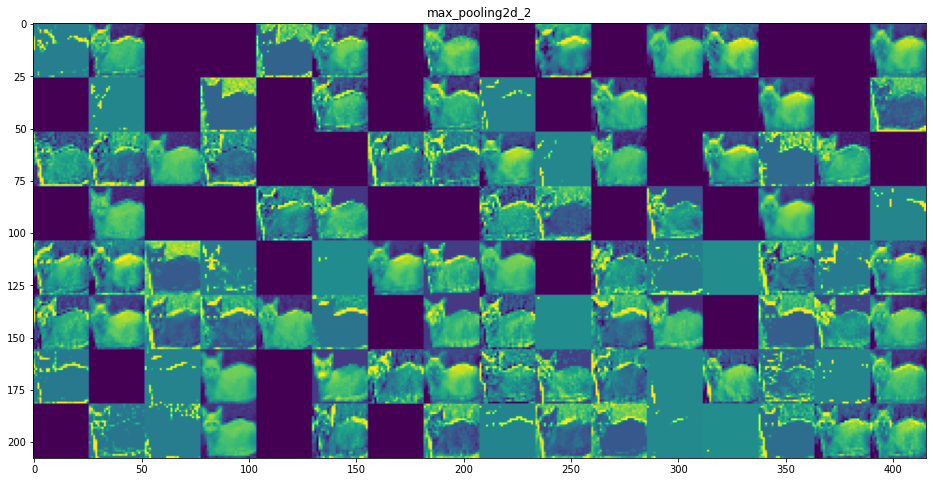

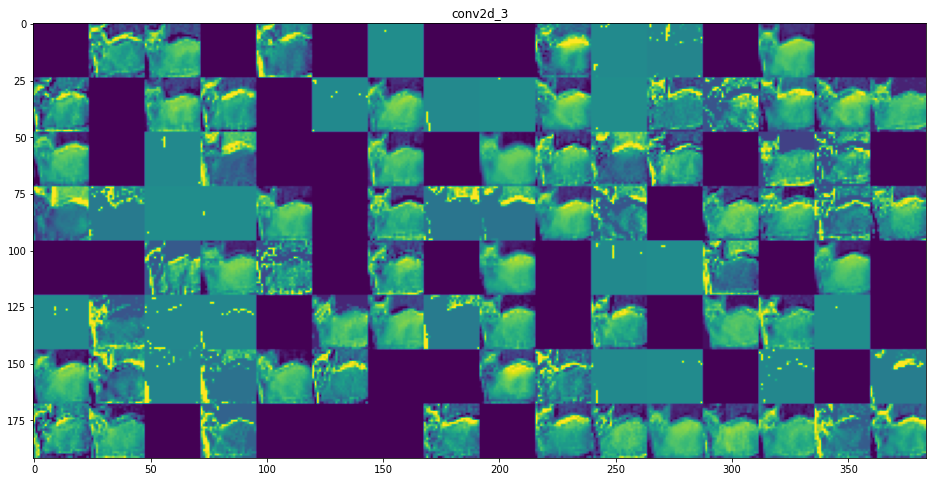

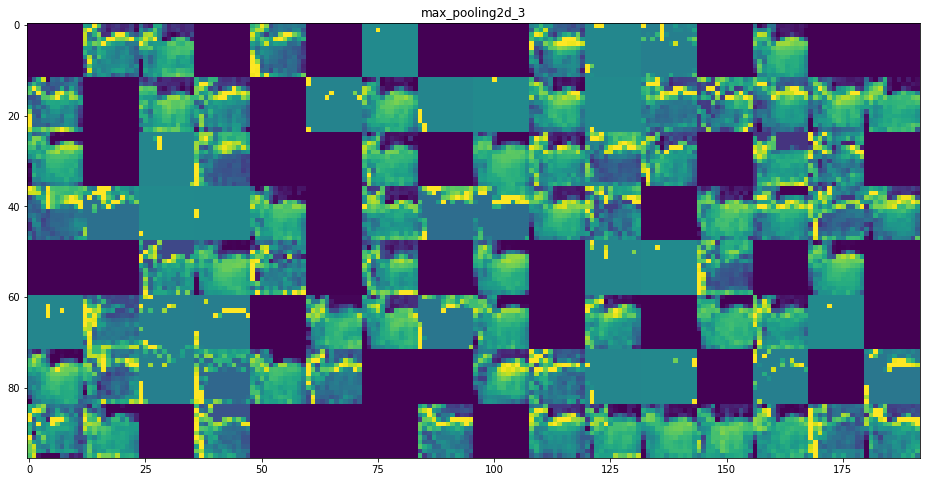

In [88]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):

    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
  
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')